In [1]:
# Cell 1: Import necessary libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Read data
csv_path = "Data/week_consumption.csv"
data = pd.read_csv(csv_path, parse_dates=["Date"], thousands=',')
data = data.sort_values(by="Date")

In [3]:
# Cell 1: Display all columns and their basic info
print("Column Overview:")
print("-" * 50)
print(data.info())
print("\nSample of first few rows:")
print(data.head())

Column Overview:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, 671 to 0
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          672 non-null    datetime64[ns]
 1   Grid Organi lbc (L1) [kW]     672 non-null    int64         
 2   Grid Organi lbc (L2) [kW]     672 non-null    int64         
 3   Grid Organi lbc (L3) [kW]     672 non-null    int64         
 4   Chargers (L1) [kW]            672 non-null    int64         
 5   Chargers (L2) [kW]            672 non-null    int64         
 6   Chargers (L3) [kW]            672 non-null    int64         
 7   Solar (L1) [kW]               672 non-null    int64         
 8   Solar (L2) [kW]               672 non-null    int64         
 9   Solar (L3) [kW]               672 non-null    int64         
 10  Chargers achteraan (L1) [kW]  672 n

In [4]:
# Cell 2: Group columns by type
column_groups = {
    'Grid Columns': [col for col in data.columns if 'Grid' in col],
    'Charger Columns': [col for col in data.columns if 'Charger' in col],
    'Solar Columns': [col for col in data.columns if 'Solar' in col],
    'Other Columns': [col for col in data.columns if not any(x in col for x in ['Grid', 'Charger', 'Solar'])]
}

print("\nColumn Groupings:")
print("-" * 50)
for group, cols in column_groups.items():
    print(f"\n{group}:")
    for col in cols:
        print(f"  - {col}")


Column Groupings:
--------------------------------------------------

Grid Columns:
  - Grid Organi lbc (L1) [kW]
  - Grid Organi lbc (L2) [kW]
  - Grid Organi lbc (L3) [kW]

Charger Columns:
  - Chargers (L1) [kW]
  - Chargers (L2) [kW]
  - Chargers (L3) [kW]
  - Chargers achteraan (L1) [kW]
  - Chargers achteraan (L2) [kW]
  - Chargers achteraan (L3) [kW]

Solar Columns:
  - Solar (L1) [kW]
  - Solar (L2) [kW]
  - Solar (L3) [kW]

Other Columns:
  - Date


In [5]:
# Cell 3: Calculate and display meaningful combinations
print("\nUseful Combined Metrics:")
print("-" * 50)

# Total Grid consumption
data['Total Grid'] = data[[col for col in data.columns if 'Grid' in col]].sum(axis=1)

# Total Solar production
data['Total Solar'] = data[[col for col in data.columns if 'Solar' in col]].sum(axis=1)

# Front vs Back Chargers
data['Total Front Chargers'] = data[['Chargers (L1) [kW]', 'Chargers (L2) [kW]', 'Chargers (L3) [kW]']].sum(axis=1)
data['Total Back Chargers'] = data[['Chargers achteraan (L1) [kW]', 'Chargers achteraan (L2) [kW]', 'Chargers achteraan (L3) [kW]']].sum(axis=1)

# Phase-wise totals (L1, L2, L3)
data['Total L1'] = data[[col for col in data.columns if 'L1' in col]].sum(axis=1)
data['Total L2'] = data[[col for col in data.columns if 'L2' in col]].sum(axis=1)
data['Total L3'] = data[[col for col in data.columns if 'L3' in col]].sum(axis=1)

# Display summary statistics for combined metrics
combined_metrics = ['Total Grid', 'Total Solar', 'Total Front Chargers', 'Total Back Chargers', 
                   'Total L1', 'Total L2', 'Total L3']
print("\nSummary Statistics for Combined Metrics:")
print(data[combined_metrics].describe())


Useful Combined Metrics:
--------------------------------------------------

Summary Statistics for Combined Metrics:
          Total Grid   Total Solar  Total Front Chargers  Total Back Chargers  \
count     672.000000    672.000000            672.000000           672.000000   
mean    26312.232143   1291.950893           4296.273810          6821.386905   
std     27373.038469   2557.286161          10594.910322         17098.489555   
min      1284.000000    -10.000000             64.000000            27.000000   
25%     12446.000000     -7.000000             72.000000            67.000000   
50%     15620.500000     -7.000000             73.000000            72.000000   
75%     23995.500000   1456.000000             91.000000          3694.000000   
max    151684.000000  13284.000000          71625.000000        124140.000000   

           Total L1      Total L2      Total L3  
count    672.000000    672.000000    672.000000  
mean   14037.730655  12266.465774  12417.647321  
s

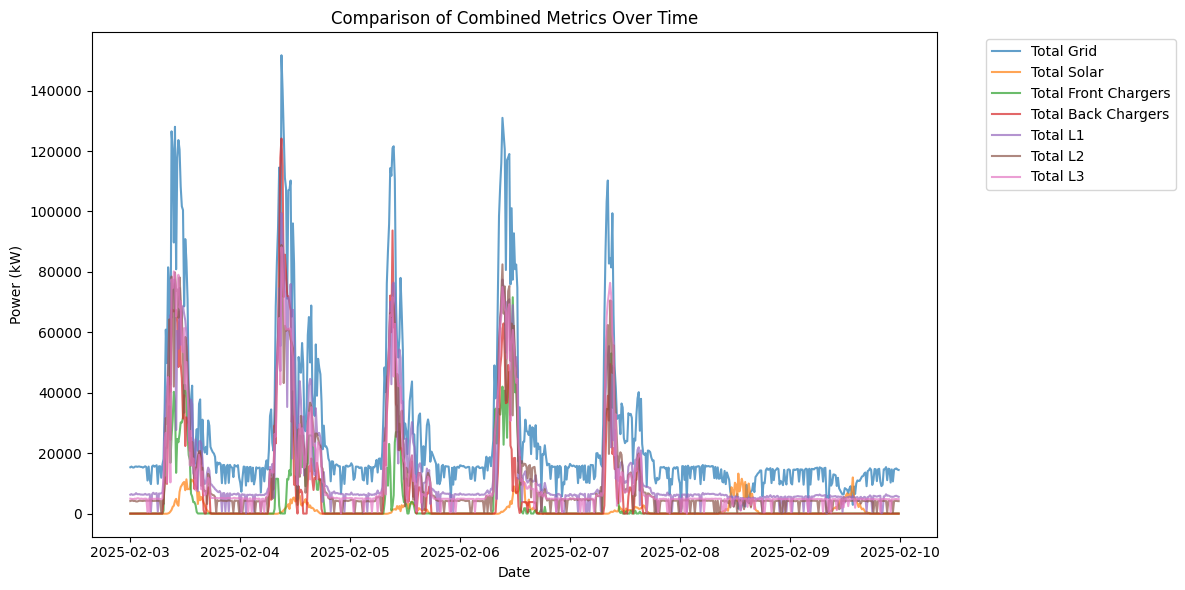

In [6]:
# Cell 4: Visualize the relationships between combined metrics
plt.figure(figsize=(12, 6))
for metric in combined_metrics:
    plt.plot(data['Date'], data[metric], label=metric, alpha=0.7)
plt.title('Comparison of Combined Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

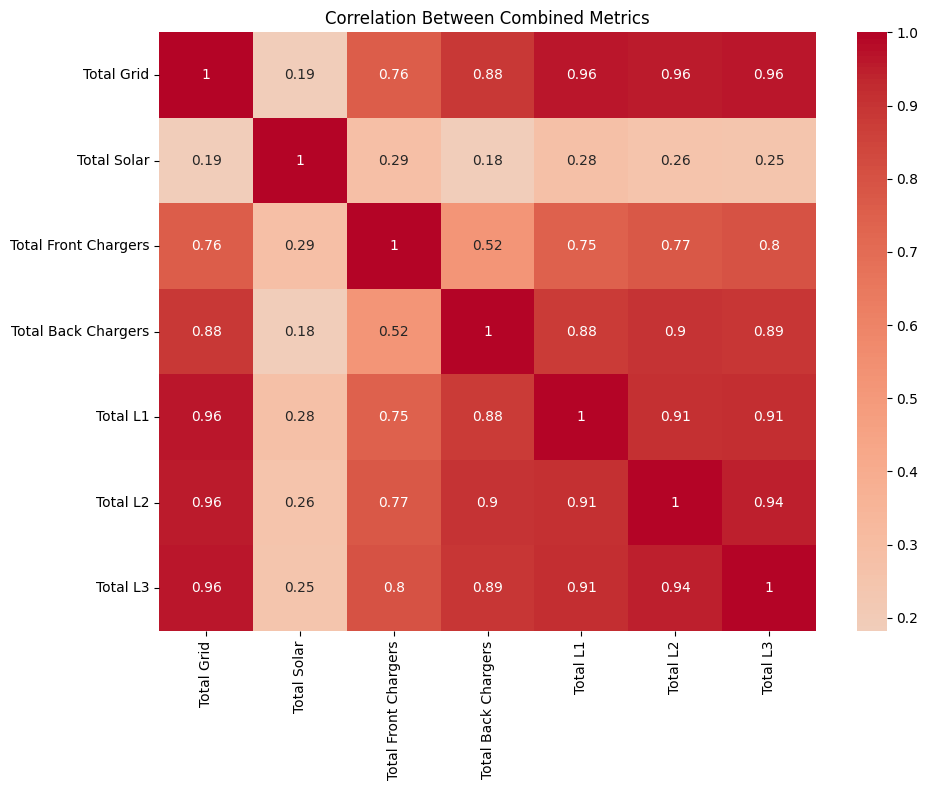

In [7]:
# Cell 5: Correlation heatmap of combined metrics
plt.figure(figsize=(10, 8))
correlation_matrix = data[combined_metrics].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Combined Metrics')
plt.tight_layout()
plt.show()

In [ ]:
# Cell 6: Stacked bar chart for phase distribution
phase_data = data[['Total L1', 'Total L2', 'Total L3']].resample('D', on='Date').mean()
phase_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Daily Average Power Distribution by Phase')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend(title='Phases')
plt.tight_layout()
plt.show()

KeyError: 'date'